In [4]:
# 导入基本的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 设置绘图风格
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [6]:
stock_data = pd.read_csv("./combined_stock_data.csv")
stock_data

,股票名称,股票代码,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,腾讯控股,00700,2004-06-16,-29.061,-29.105,-29.012,-29.119,439775008,1.947628e+09,-0.37,0.30,0.087,26.17
1,腾讯控股,00700,2004-06-17,-29.105,-29.090,-29.061,-29.109,83801504,3.556330e+08,-0.16,0.05,0.015,4.99
2,腾讯控股,00700,2004-06-18,-29.095,-29.129,-29.085,-29.143,36598000,1.492170e+08,-0.20,-0.13,-0.039,2.18
3,腾讯控股,00700,2004-06-21,-29.109,-29.134,-29.109,-29.143,22817000,9.210100e+07,-0.12,-0.02,-0.005,1.36
4,腾讯控股,00700,2004-06-23,-29.124,-29.051,-29.046,-29.129,55016000,2.344170e+08,-0.28,0.28,0.083,3.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19332,苹果,AAPL,2023-09-25,174.200,176.080,176.970,174.150,46172740,8.111390e+09,1.61,0.74,1.290,0.30
19333,苹果,AAPL,2023-09-26,174.820,171.960,175.200,171.660,64588945,1.115645e+10,2.01,-2.34,-4.120,0.41
19334,苹果,AAPL,2023-09-27,172.620,170.430,173.040,169.050,66921808,1.141146e+10,2.32,-0.89,-1.530,0.43
19335,苹果,AAPL,2023-09-28,169.340,170.690,172.030,167.620,56294419,9.587716e+09,2.59,0.15,0.260,0.36


In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19337 entries, 0 to 19336
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   股票名称    19337 non-null  object 
 1   股票代码    19337 non-null  object 
 2   日期      19337 non-null  object 
 3   开盘      19337 non-null  float64
 4   收盘      19337 non-null  float64
 5   最高      19337 non-null  float64
 6   最低      19337 non-null  float64
 7   成交量     19337 non-null  int64  
 8   成交额     19337 non-null  float64
 9   振幅      19337 non-null  float64
 10  涨跌幅     19337 non-null  float64
 11  涨跌额     19337 non-null  float64
 12  换手率     19337 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [8]:
# 直接输出会超出大小限制

# 使用groupby方法按照股票名称分组
grouped_data = stock_data.groupby('股票名称')
stock_codes = ['贵州茅台', '腾讯', 'AAPL']

# 创建一个空的DataFrame来存储描述性统计信息
summary_df = pd.DataFrame()

# 针对每个分组执行describe，并将结果添加到summary_df中
for stock_codes, group in grouped_data:
    summary = group.describe()
    summary['股票公司'] = stock_codes
    summary_df = pd.concat([summary_df, summary])

# 保存summary_df为CSV文件
summary_file_path = "stock_data_summary.csv"
summary_df.to_csv(summary_file_path, index=False)

In [9]:
summary_df

,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,股票公司
count,4757.000000,4757.000000,4757.000000,4757.000000,4.757000e+03,4.757000e+03,4.757000e+03,4757.000000,4757.000000,4757.000000,腾讯控股
mean,140.876743,140.665408,142.927345,138.535015,1.321277e+07,3.868264e+09,-4.031911e+00,1.662157,0.070505,0.257128,腾讯控股
std,179.740512,179.400412,181.954607,177.122137,1.447258e+07,5.695207e+09,4.088997e+02,84.615850,5.753323,0.424509,腾讯控股
min,-29.255000,-29.255000,-29.231000,-29.255000,4.523000e+05,2.277000e+06,-2.720000e+04,-1900.000000,-46.588000,0.030000,腾讯控股
25%,-16.462000,-16.549000,-16.277000,-16.821000,3.892000e+06,3.572394e+08,-1.700000e-01,-1.180000,-0.758000,0.150000,腾讯控股
50%,68.698000,69.474000,70.833000,67.591000,9.896000e+06,1.724712e+09,2.110000e+00,0.010000,0.004000,0.210000,腾讯控股
75%,302.241000,303.000000,306.899000,299.135000,1.886354e+07,5.818049e+09,3.770000e+00,1.460000,0.873000,0.290000,腾讯控股
max,720.758000,720.273000,729.008000,705.714000,4.397750e+08,1.486821e+11,2.247370e+03,4950.000000,73.279000,26.170000,腾讯控股
count,9291.000000,9291.000000,9291.000000,9291.000000,9.291000e+03,9.291000e+03,9.291000e+03,9291.000000,9291.000000,9291.000000,苹果
mean,15.463617,15.476559,15.707714,15.227563,2.371580e+07,1.697389e+09,3.854442e+03,0.197439,0.019393,0.699042,苹果


In [19]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM,SimpleRNN,GRU
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [11]:
# 加载股票数据
data = pd.read_csv('苹果.csv') 

# 将日期列转换为日期时间类型
data['日期'] = pd.to_datetime(data['日期'])

# 筛选出2023年的数据
stock_data_2023 = data[data['日期'].dt.year == 2023]

# 打印2023年的股票数据
stock_data_2023

,股票名称,股票代码,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
9104,苹果,AAPL,2023-01-03,129.57,124.36,130.19,123.46,112117471,1.409000e+10,5.21,-3.76,-4.86,0.71
9105,苹果,AAPL,2023-01-04,126.18,125.65,127.95,124.37,89113633,1.128662e+10,2.88,1.04,1.29,0.56
9106,苹果,AAPL,2023-01-05,126.42,124.31,127.06,124.05,80962708,1.020828e+10,2.40,-1.07,-1.34,0.51
9107,苹果,AAPL,2023-01-06,125.30,128.91,129.58,124.18,87754715,1.125359e+10,4.34,3.70,4.60,0.55
9108,苹果,AAPL,2023-01-09,129.76,129.44,132.70,129.18,70790813,9.321839e+09,2.73,0.41,0.53,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9286,苹果,AAPL,2023-09-25,174.20,176.08,176.97,174.15,46172740,8.111390e+09,1.61,0.74,1.29,0.30
9287,苹果,AAPL,2023-09-26,174.82,171.96,175.20,171.66,64588945,1.115645e+10,2.01,-2.34,-4.12,0.41
9288,苹果,AAPL,2023-09-27,172.62,170.43,173.04,169.05,66921808,1.141146e+10,2.32,-0.89,-1.53,0.43
9289,苹果,AAPL,2023-09-28,169.34,170.69,172.03,167.62,56294419,9.587716e+09,2.59,0.15,0.26,0.36


In [12]:
# 2. 选择需要的特征（收盘）并进行归一化
X_train_set = stock_data[['收盘']].values.astype(float)
scaler = MinMaxScaler()
X_train_set = scaler.fit_transform(X_train_set)
X_train_set

array([[0.04930755],
       [0.04931316],
       [0.04929857],
       ...,
       [0.12395253],
       [0.1240498 ],
       [0.12482043]])

In [13]:
#取出几天前股价来建立成特征和标签数据集
def create_dataset(ds, look_back=1):
    X_data, Y_data = [],[]
    for i in range(len(ds)-look_back):
        X_data.append(ds[i:(i+look_back), 0])
        Y_data.append(ds[i+look_back, 0])
    return np.array(X_data), np.array(Y_data)
look_back = 60
print("回看天数:", look_back)
# 分割成特征数据和标签数据
X_train, Y_train = create_dataset(X_train_set, look_back)

print(X_train)

回看天数: 60
[[0.04930755 0.04931316 0.04929857 ... 0.04928062 0.04927687 0.04927126]
 [0.04931316 0.04929857 0.0492967  ... 0.04927687 0.04927126 0.049275  ]
 [0.04929857 0.0492967  0.04932775 ... 0.04927126 0.049275   0.04925854]
 ...
 [0.13210406 0.13168133 0.1318609  ... 0.12558359 0.12606617 0.1245249 ]
 [0.13168133 0.1318609  0.13143817 ... 0.12606617 0.1245249  0.12395253]
 [0.1318609  0.13143817 0.13066379 ... 0.1245249  0.12395253 0.1240498 ]]


In [14]:
# 转换成(样本数, 时步, 特征)张量  
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print("X_train.shape: ", X_train.shape)
print("Y_train.shape: ", Y_train.shape)

X_train.shape:  (19277, 60, 1)
Y_train.shape:  (19277,)


In [15]:
# 循环神经网络-RNN
# 定义模型 
model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()   # 显示模型摘要资讯  
#编译模型
model.compile(loss="mse", optimizer="adam")

#训练模型
model.fit(X_train, Y_train, epochs=100, batch_size=32)
# 保存模型到文件
model.save("apple_rnn_model.h5")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 60, 50)            2600      
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 7701 (30.08 KB)
Trainable params: 7701 (30.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
603/603 [=

d:\work\Graduation_Project\StockAnalytics_LSTM\stockanalytics\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
# LSTM模型
# 定义模型
def create_lstm_model(input_shape, lstm_units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(lstm_units, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(lstm_units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(lstm_units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    return model

# 构建模型
model = create_lstm_model((X_train.shape[1], 1))

# 显示模型摘要
model.summary()

# 编译模型
model.compile(loss="mse", optimizer="adam")

# 定义早期停止和模型检查点回调
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("LSTM_best.h5", save_best_only=True)

# 训练模型，并加入回调函数
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, 
                    validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

# 保存模型到文件
model.save("lstm_model.h5")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_3 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

d:\work\Graduation_Project\StockAnalytics_LSTM\stockanalytics\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


482/482 [==============================] - 31s 65ms/step - loss: 6.4408e-04 - val_loss: 8.9445e-06
Epoch 3/100
482/482 [==============================] - 30s 62ms/step - loss: 4.9446e-04 - val_loss: 9.9698e-07
Epoch 4/100
482/482 [==============================] - 29s 61ms/step - loss: 4.7729e-04 - val_loss: 8.9907e-06
Epoch 5/100
482/482 [==============================] - 30s 61ms/step - loss: 4.9876e-04 - val_loss: 2.3196e-05
Epoch 6/100
482/482 [==============================] - 29s 61ms/step - loss: 4.0354e-04 - val_loss: 1.2070e-06
Epoch 7/100
482/482 [==============================] - 29s 61ms/step - loss: 4.1670e-04 - val_loss: 8.5210e-06
Epoch 8/100
482/482 [==============================] - 29s 61ms/step - loss: 4.0227e-04 - val_loss: 1.6542e-06
Epoch 9/100
482/482 [==============================] - 30s 61ms/step - loss: 3.7113e-04 - val_loss: 1.2513e-06
Epoch 10/100
482/482 [==============================] - 30s 63ms/step - loss: 3.6585e-04 - val_loss: 2.5379e-06
Epoch 11/100

In [22]:
from keras.models import load_model
# 加载模型
apple_rnn_model = load_model("apple_rnn_model.h5")
apple_lstm_model = load_model("apple_lstm_model.h5")

In [17]:
# 使用模型预测股价 - 2023年预测股价
df_test = pd.read_csv("苹果.csv")
X_test_set = df_test.iloc[:,4:5].values

# 产生标签数据
_, Y_test = create_dataset(X_test_set, look_back)

#特征数据和标准化
X_test_s = scaler.transform(X_test_set)
X_test,_ = create_dataset(X_test_s, look_back)

# 转换成(样本数, 时步, 特征)张量
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test_pred = apple_rnn_model.predict(X_test)

#  将预测值转换回股价
X_test_pred_price = scaler.inverse_transform(X_test_pred)

289/289 [==============================] - 2s 6ms/step


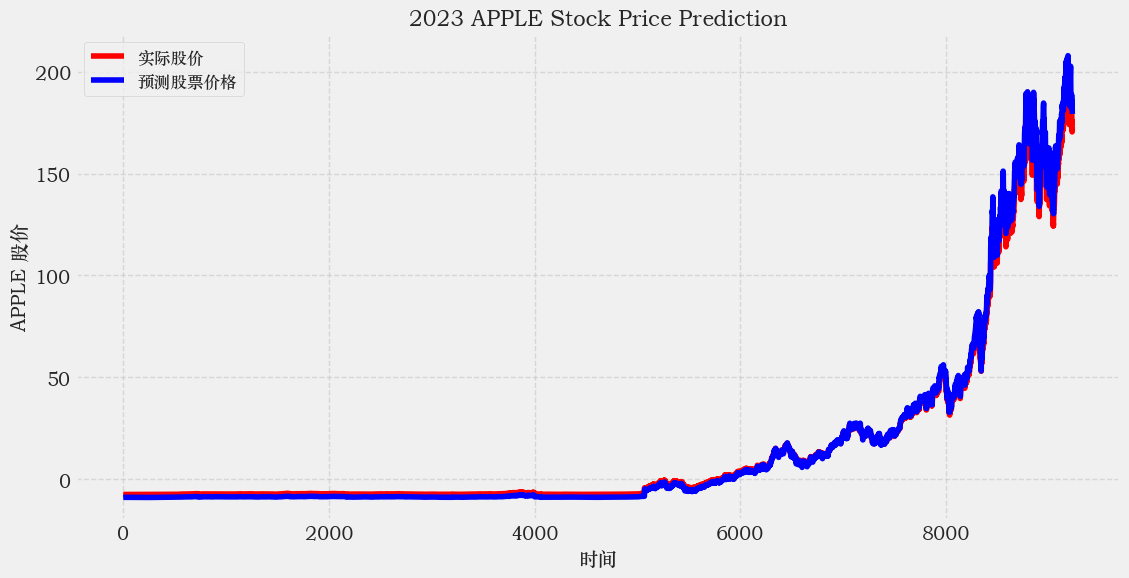

In [18]:
#  绘出股价图表  
from pylab import mpl
# 设置中文字体
mpl.rcParams['font.sans-serif'] = ['STZhongsong']
mpl.rcParams['axes.unicode_minus'] = False

# 绘制实际股价和预测股价的图像
plt.figure(figsize=(12, 6))  # 设置图像大小
plt.plot(Y_test, color="red", label="实际股价")
plt.plot(X_test_pred_price, color="blue", label="预测股票价格")
plt.title("2023 APPLE Stock Price Prediction", fontsize=16)  # 设置标题和字体大小
plt.xlabel("时间", fontsize=14)  # 设置x轴标签和字体大小
plt.ylabel("APPLE 股价", fontsize=14)  # 设置y轴标签和字体大小
plt.legend(fontsize=12)  # 设置图例字体大小
plt.grid(True, linestyle='--', alpha=0.7)  # 添加网格线，并设置样式和透明度
plt.show()

In [23]:
# 使用LSTM模型预测股价 - 2023年预测股价
df_test = pd.read_csv("苹果.csv")
X_test_set = df_test.iloc[:,4:5].values

# 产生标签数据
_, Y_test = create_dataset(X_test_set, look_back)

#特征数据和标准化
X_test_s = scaler.transform(X_test_set)
X_test,_ = create_dataset(X_test_s, look_back)

# 转换成(样本数, 时步, 特征)张量
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test_pred = apple_lstm_model.predict(X_test)

#  将预测值转换回股价
X_test_pred_price = scaler.inverse_transform(X_test_pred)

289/289 [==============================] - 6s 17ms/step


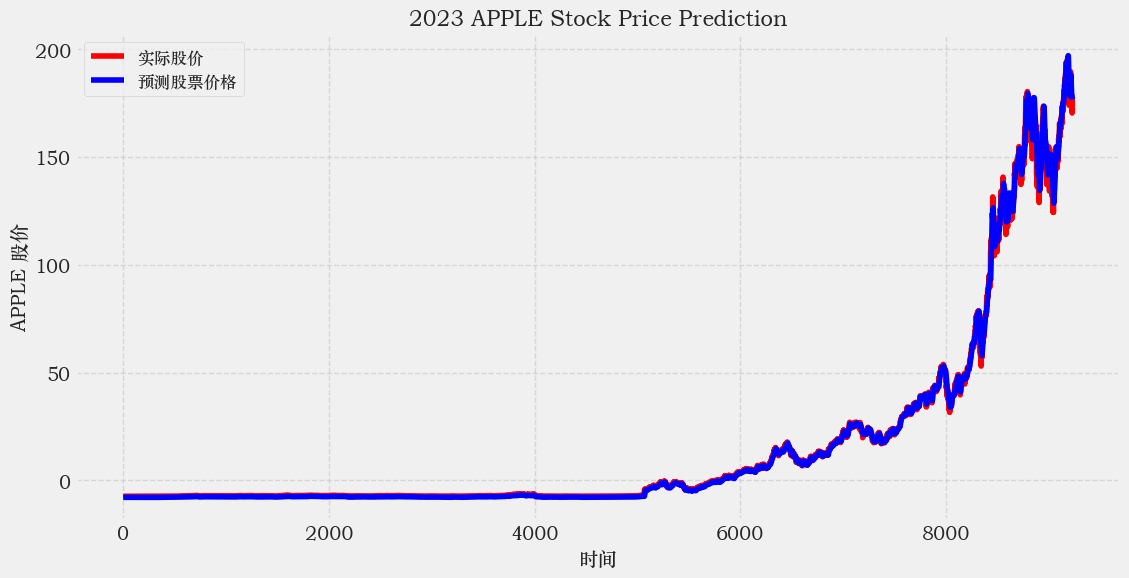

In [24]:
#  绘出股价图表  LSTM
from pylab import mpl
# 设置中文字体
mpl.rcParams['font.sans-serif'] = ['STZhongsong']
mpl.rcParams['axes.unicode_minus'] = False

# 绘制实际股价和预测股价的图像
plt.figure(figsize=(12, 6))  # 设置图像大小
plt.plot(Y_test, color="red", label="实际股价")
plt.plot(X_test_pred_price, color="blue", label="预测股票价格")
plt.title("2023 APPLE Stock Price Prediction", fontsize=16)  # 设置标题和字体大小
plt.xlabel("时间", fontsize=14)  # 设置x轴标签和字体大小
plt.ylabel("APPLE 股价", fontsize=14)  # 设置y轴标签和字体大小
plt.legend(fontsize=12)  # 设置图例字体大小
plt.grid(True, linestyle='--', alpha=0.7)  # 添加网格线，并设置样式和透明度
plt.show()